In [1]:
import pandas as pd
import json
from transformers import AutoTokenizer

/home/cosmoquester/aibookathon/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../dataset/dataset-brunchbook/dev.jsonl", sep="\x00", header=None)

df["data"] = df[0].apply(json.loads)
df["title"] = df["data"].apply(lambda data: data["title"])
df["content"] = df["data"].apply(lambda data: data["content"])
df = df[["title", "content"]].copy()

In [3]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/polyglot-ko-1.3b")

In [4]:
df["tokens"] = df["content"].apply(lambda text: tokenizer(text, return_attention_mask=False, return_token_type_ids=False, truncation=False)["input_ids"])

In [5]:
df["token_lengths"] = df["tokens"].apply(len)
df["char_lengths"] = df["content"].apply(len)

In [6]:
token_length_counts = df["token_lengths"].value_counts()

In [7]:
print("토큰 개수 평균:", df["token_lengths"].mean())
print("토큰 개수 중간값:", df["token_lengths"].median())
print("토큰 개수 표준편차:", df["token_lengths"].std())

토큰 개수 평균: 22006.19096045198
토큰 개수 중간값: 19216.0
토큰 개수 표준편차: 15157.53459149033


In [8]:
print("글자 개수 평균:", df["char_lengths"].mean())
print("글자 개수 중간값:", df["char_lengths"].median())
print("글자 개수 표준편차:", df["char_lengths"].std())

글자 개수 평균: 40760.55141242938
글자 개수 중간값: 35738.0
글자 개수 표준편차: 28391.421808549585


In [9]:
for n in [1000, 5000, 10000, 20000]:
    n_rows_over_characters = df[df["char_lengths"]>n]["title"].count()
    print(f"{n:5} 글자 이상 문서: {n_rows_over_characters:5}개, {n_rows_over_characters / df.shape[0] * 100:8.4f}%")

 1000 글자 이상 문서:   872개,  98.5311%
 5000 글자 이상 문서:   842개,  95.1412%
10000 글자 이상 문서:   814개,  91.9774%
20000 글자 이상 문서:   711개,  80.3390%


<AxesSubplot: >

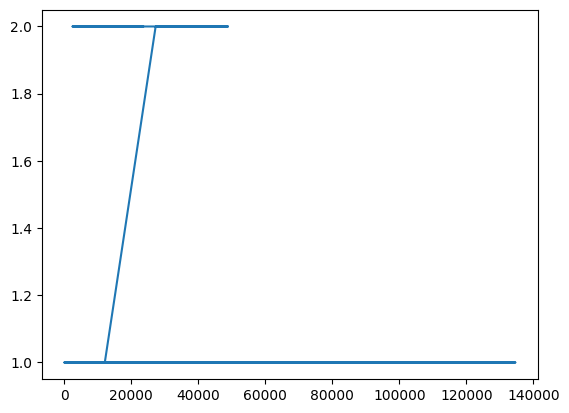

In [10]:
token_length_counts.plot()